In [ ]:
#problema 2
import tensorflow as tf 
import numpy as np
import csv 
import matplotlib.pyplot as plt 
from urllib import request

def curado(v,k):
  total = np.zeros(np.size(v))
  false_array = np.zeros(np.size(v))
  c = 0
  for i in np.arange(k+1):
    mask = np.where(v == i, True, False)
    if(np.array_equal(mask, false_array)):#condicion de que todo el array es false
      continue
    filtrado = mask*c
    total = total+filtrado
    c = c+1
  return total, c 

example_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv" 
f = request.urlopen(example_url) 
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows = 1) #salteo la primera fila

quimicos = np.array(dataset[:,:9]) #tomo las primeras 9 columnas
resultado = np.array(dataset[:,9]) #la ultima columna me determina el resultado
largo = np.size(resultado) 
#curacion de datos
resultado, k = curado(resultado, 7)

#normalizacion de datos 
desvio_std = np.std(quimicos,axis=0) #poner el axis si o si para que calcule la media de forma adecuada.
media = np.mean(quimicos,axis=0)
quimicos_norm = (quimicos-media)/desvio_std


In [ ]:
#modelo softmax 

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(k, input_dim=9))#dense(numero de clases a clasificar, dimension del input)
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3.5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy') 
hist = model.fit(x= quimicos_norm, y= resultado, batch_size = largo, epochs=5000, callbacks=[es])

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2502/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2503/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2504/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2505/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2506/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2507/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2508/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2509/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7290
Epoch 2510/5000
1/1 [=========================

In [ ]:
losses = np.array(hist.history['loss']) 
param = model.get_weights()
accuracy = np.array(hist.history['accuracy'])
print("Accuracy de:", accuracy[np.size(accuracy)-1])
print("Perdida de:", losses[np.size(losses)-1])

example = np.array([1.52,13,3.5,1.2,73,0.6,9,0.1,0.2])
media_expl = np.mean(example,axis=0)
desv_std_expl = np.std(example,axis=0)
example_norm = (example-media_expl)/desv_std_expl
example = example_norm.reshape(1,9)

def clasificacion(muestra):
  predict = model.predict(x=muestra)
  #print(predict)
  vidrios = ["Building windows float processed", "Building windows float processed", 
             "Vehicle windows float processed", "Containers", "Tableware", "headlamps"]
  tipo = np.argmax(predict)
  return vidrios[tipo]

clasificacion(example)

Accuracy de: 0.7289719581604004
Perdida de: 0.5899626016616821


'headlamps'

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67        70
         1.0       0.67      0.72      0.70        76
         2.0       0.50      0.24      0.32        17
         3.0       0.92      0.85      0.88        13
         4.0       1.00      1.00      1.00         9
         5.0       0.97      1.00      0.98        29

    accuracy                           0.73       214
   macro avg       0.79      0.75      0.76       214
weighted avg       0.72      0.73      0.72       214



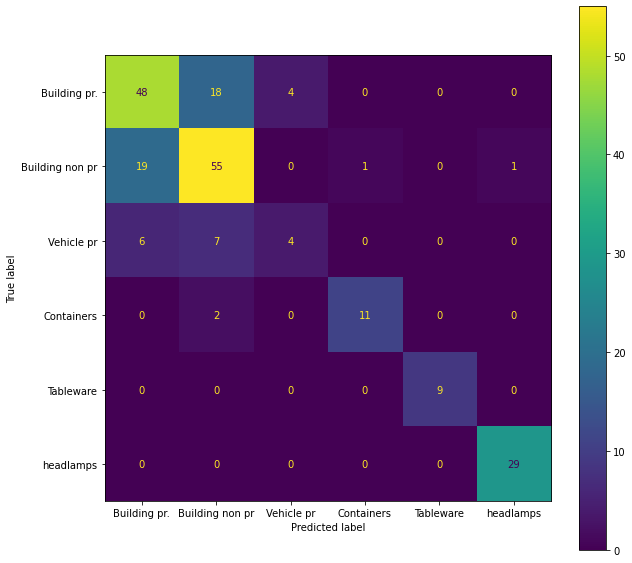

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
valores_estimados = model.predict(x = quimicos_norm)
resultados_estimados = []
for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))
def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["Building pr.", "Building non pr", 
             "Vehicle pr", "Containers", "Tableware", "headlamps"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(resultado,resultados_estimados)